In [255]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [256]:
# Files to load
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

In [257]:
# Read the city data file and store it in a pandas DataFrame.
city_data_df = pd.read_csv(city_data_to_load)
city_data_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [258]:
# Read the ride data file and store it in a pandas DataFrame.
ride_data_df = pd.read_csv(ride_data_to_load)
ride_data_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789


In [259]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the DataFrame
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [260]:
# Create DataFrame for "type"
type_data_df = pyber_data_df.set_index("type")
type_data_df

,city,date,fare,ride_id,driver_count
type,,,,,
Urban,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5
Urban,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72
Urban,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57
Urban,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34
Urban,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46
...,...,...,...,...,...
Rural,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6
Rural,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2
Rural,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1


In [261]:
# Use groupby() on 
# pyber_data_df.groupby(["type"]).count()["ride_id"]
# pyber_data_df.groupby(["type"]).sum()["driver_count"]
# pyber_data_df.groupby(["type"]).sum()["fare"]

type_ride_id = pyber_data_df.groupby(["type"]).count()["ride_id"]
type_ride_id_df = pd.DataFrame(type_ride_id)

type_driver_count = pyber_data_df.groupby(["type"]).sum()["driver_count"]
type_driver_count_df = pd.DataFrame(type_driver_count)

type_fare_count = pyber_data_df.groupby(["type"]).sum()["fare"]
type_fare_count_df = pd.DataFrame(type_fare_count)

In [262]:
type_driver_count_df

,driver_count
type,
Rural,537
Suburban,8570
Urban,59602


In [263]:
type_total_df = type_ride_id_df.merge(type_driver_count_df.merge(type_fare_count_df,left_index=True, right_index=True),left_index=True, right_index=True)
type_total_df

,ride_id,driver_count,fare
type,,,
Rural,125,537,4327.93
Suburban,625,8570,19356.33
Urban,1625,59602,39854.38


In [264]:
type_fare_rider_avg = (type_fare_count / type_ride_id)
type_fare_rider_avg_df = pd.DataFrame(type_fare_rider_avg)

type_fare_driver_avg = (type_fare_count / type_driver_count)
type_fare_driver_avg_df = pd.DataFrame(type_fare_driver_avg)

type_totalavg_df = type_fare_rider_avg_df.merge(type_fare_driver_avg_df, left_index=True, right_index=True)
type_totalavg_df

,0_x,0_y
type,,
Rural,34.623440,8.059460
Suburban,30.970128,2.258615
Urban,24.525772,0.668675


In [265]:
merged_type_df = type_total_df.merge(type_totalavg_df, left_index=True, right_index=True)
merged_type_df

,ride_id,driver_count,fare,0_x,0_y
type,,,,,
Rural,125,537,4327.93,34.623440,8.059460
Suburban,625,8570,19356.33,30.970128,2.258615
Urban,1625,59602,39854.38,24.525772,0.668675


In [266]:
# Format merged_type_df
new_merged_type_df = merged_type_df.rename(columns = {"ride_id":"Total Rides",
                                "driver_count":"Total Drivers",
                               "fare":"Total Fares",
                               "0_x":"Avgerage Fare per Ride",
                               "0_y":"Average Fare per Driver"})

new_merged_type_df

,Total Rides,Total Drivers,Total Fares,Avgerage Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125,537,4327.93,34.623440,8.059460
Suburban,625,8570,19356.33,30.970128,2.258615
Urban,1625,59602,39854.38,24.525772,0.668675


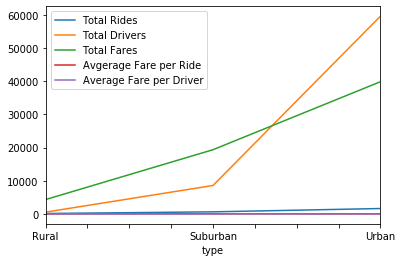

In [267]:
new_merged_type_df.plot()

In [268]:
x_pyber_data_df = pyber_data_df.rename(columns = {'city': 'City', 
                                'date':'Date',
                                'fare':'Fare', 
                                'ride_id': 'Ride Id',
                                'driver_count': 'No. Drivers', 
                                'type':'City Type'})
y_pyber_data_df = x_pyber_data_df.set_index("Date")

In [269]:
y_pyber_data_df = x_pyber_data_df.set_index("Date")
y_pyber_data_df

,City,Fare,Ride Id,No. Drivers,City Type
Date,,,,,
2019-01-14 10:14:22,Lake Jonathanshire,13.83,5739410935873,5,Urban
2019-03-04 18:24:09,South Michelleport,30.24,2343912425577,72,Urban
2019-02-24 04:29:00,Port Samanthamouth,33.44,2005065760003,57,Urban
2019-02-10 23:22:03,Rodneyfort,23.44,5149245426178,34,Urban
2019-03-06 04:28:35,South Jack,34.58,3908451377344,46,Urban
...,...,...,...,...,...
2019-04-29 17:04:39,Michaelberg,13.38,8550365057598,6,Rural
2019-01-30 00:05:47,Lake Latoyabury,20.76,9018727594352,2,Rural
2019-02-10 21:03:50,North Jaime,11.11,2781339863778,1,Rural


In [270]:
fare_df = y_pyber_data_df.copy()
fare_df

,City,Fare,Ride Id,No. Drivers,City Type
Date,,,,,
2019-01-14 10:14:22,Lake Jonathanshire,13.83,5739410935873,5,Urban
2019-03-04 18:24:09,South Michelleport,30.24,2343912425577,72,Urban
2019-02-24 04:29:00,Port Samanthamouth,33.44,2005065760003,57,Urban
2019-02-10 23:22:03,Rodneyfort,23.44,5149245426178,34,Urban
2019-03-06 04:28:35,South Jack,34.58,3908451377344,46,Urban
...,...,...,...,...,...
2019-04-29 17:04:39,Michaelberg,13.38,8550365057598,6,Rural
2019-01-30 00:05:47,Lake Latoyabury,20.76,9018727594352,2,Rural
2019-02-10 21:03:50,North Jaime,11.11,2781339863778,1,Rural


In [271]:
fare_df_2 = fare_df.drop(columns=['City', 'Ride Id', 'No. Drivers'])
fare_df_2

,Fare,City Type
Date,,
2019-01-14 10:14:22,13.83,Urban
2019-03-04 18:24:09,30.24,Urban
2019-02-24 04:29:00,33.44,Urban
2019-02-10 23:22:03,23.44,Urban
2019-03-06 04:28:35,34.58,Urban
...,...,...
2019-04-29 17:04:39,13.38,Rural
2019-01-30 00:05:47,20.76,Rural
2019-02-10 21:03:50,11.11,Rural


In [272]:
fare_df_2.groupby(["City Type"]).sum()["Fare"]

City Type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: Fare, dtype: float64

In [273]:
fare_df_2.groupby(["Date"]).sum()["Fare"]

Date
2019-01-01 00:08:16    37.91
2019-01-01 00:46:46    47.74
2019-01-01 02:07:24    24.07
2019-01-01 03:46:50     7.57
2019-01-01 05:23:21    10.75
                       ...  
2019-05-08 04:20:00    21.99
2019-05-08 04:39:49    18.45
2019-05-08 07:29:01    18.55
2019-05-08 11:38:35    19.77
2019-05-08 13:10:18    18.04
Name: Fare, Length: 2375, dtype: float64

In [274]:
fare_df_new = fare_df_2.reset_index()

In [275]:
pivot_fare = pd.pivot_table(fare_df_new, values='Fare', index=['Date'], columns=['City Type'], aggfunc=np.sum)
pivot_fare

City Type,Rural,Suburban,Urban
Date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-05-08 04:20:00,NaN,NaN,21.99
2019-05-08 04:39:49,NaN,NaN,18.45
2019-05-08 07:29:01,NaN,NaN,18.55


In [276]:
pivot_fare_df = pivot_fare.loc['2019-01-01':'2019-04-28']
pivot_fare_df

City Type,Rural,Suburban,Urban
Date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-04-27 17:58:27,14.01,NaN,NaN
2019-04-27 19:45:48,NaN,28.84,NaN
2019-04-27 20:41:36,NaN,NaN,8.28


In [277]:
pivot_fare_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2177 entries, 2019-01-01 00:08:16 to 2019-04-27 23:52:44
Data columns (total 3 columns):
Rural       114 non-null float64
Suburban    567 non-null float64
Urban       1496 non-null float64
dtypes: float64(3)
memory usage: 68.0+ KB


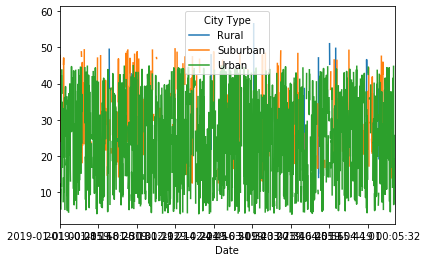

In [278]:
pivot_fare_df.plot()